In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [44]:
!pip install fastbook import fastbook
!pip install tensorflow --upgrade
from fastai.vision.all import * 
from fastbook import * 
#fastbook.setup_book()
matplotlib.rc('image', cmap='Greys')

ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


# Zero or One? 
Here I am creating a model that can classify an image as a 0 or 1. 

MNIST is a database of images of handwritten digits by Yann Lecun and others. 

In [45]:
!pip install python-mnist numpy matplotlib

Tensorflow is a machine learning library. 

Keras is an open source library that provides a Python interface for neural networks. 

In [46]:
!pip install keras

In [47]:
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt

In [48]:
#load the MNIST dataset 
(train_images, train_labels), (_,_) = mnist.load_data()

In [49]:
#filter only 0s and 1s 

#creates a boolean array where each element is True if the label is 0 OR 1. 
# | means or 
mask = (train_labels == 0) | (train_labels == 1)

#This uses the boolean mask to select only images that have labels 0 and 1 
#train_images[mask]
filtered_images = train_images[mask]
filtered_labels = train_labels[mask]

In [50]:
#Function to display an image 
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"label: {label}")
    plt.axis('off')
    plt.show()

No way it took me an hour and a half to figure out how to download and load data from MNIST... lol 

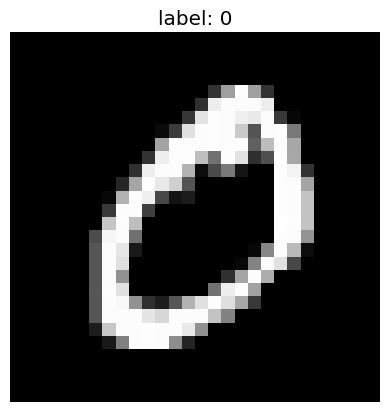

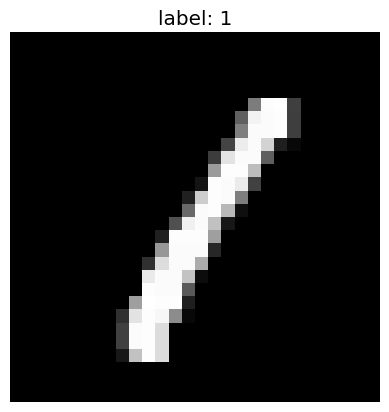

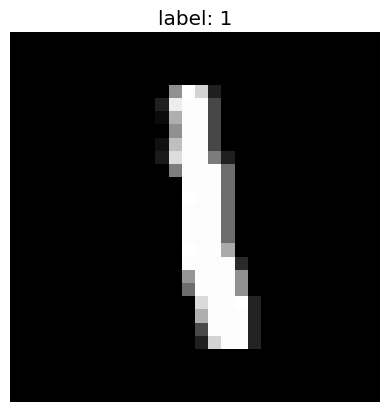

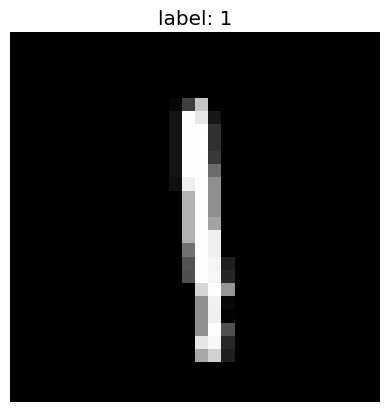

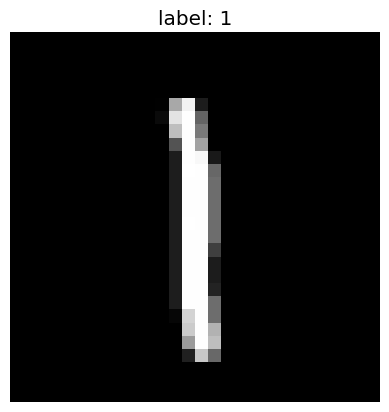

In [51]:
for i in range(5):
    display_image(filtered_images[i], filtered_labels[i])

Right now all the images are mixed up together. With the help of Claude, I am going to sort the ones and zeros into two different folders. 

In [52]:
#Create directory paths 
base_dir = '/kaggle/working/mnist_images'
zeros_dir = os.path.join(base_dir, 'zeros')
ones_dir = os.path.join(base_dir, 'ones')

In [53]:
#os.makedirs() creates directors 
#exist_ok checks if the directory already exists. When set to true, if the directory already exists, the function won't raise an error. 
os.makedirs(zeros_dir, exist_ok=True)
os.makedirs(ones_dir, exist_ok=True)

Now let's save the images. 

In [57]:
print('Saving images: ')
zeros_count = 0 
ones_count = 0
for (image, label) in (filtered_images, filtered_labels):
    if label == 0:
        save_image(image, label, zeros_count)
        zeros_count += 1
    else:
        save_image(image, label, ones_count)
        ones_count += 1
    if zeros_count + ones_count >= 1000:
        break

print(f"Saved{zeros_count} images of zeros in {zeros_dir}")
print(f"Saved{ones_count} images of zeros in {ones_dir}")


Saving images: 


ValueError: too many values to unpack (expected 2)